In [1]:
# Import libraries
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.corpus import stopwords
import nltk
import warnings
from sklearn.exceptions import ConvergenceWarning
# Suppress warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/original_raw_data.csv')

In [3]:
# Removing the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [4]:
# Initialize lemmatizer, stemmer and TweetTokenizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
tweet_tokenizer = TweetTokenizer()

In [5]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove 'rt' as it refer to a re-tweet in the tweeet and is non important for our model
stop_words.update(['RT', 'I'])

In [6]:
def preprocess_text(text):
    # Tokenize the text
    word_tokens = tweet_tokenizer.tokenize(text)

    # Lemmatize the tokens, stem the tokens, remove stopwords and non-alphabetic tokens
    processed_tokens = [stemmer.stem(lemmatizer.lemmatize(w)) for w in word_tokens if w not in stop_words and w.isalpha()]

    # Join the tokens back into a single string and return it
    return ' '.join(processed_tokens)

In [7]:
# Apply the preprocessing function to the 'tweet' column
df['processed_tweet'] = df['tweet'].apply(preprocess_text)
df

,count,hate_speech,offensive_language,neither,class,tweet,processed_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,as woman complain clean hous man alway take trash
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe place
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg you ever fuck bitch start cri you confus ...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,the shit hear might true might faker bitch tol...
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie right hi tl trash now mine bibl scr...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart babi drove redneck crazi
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


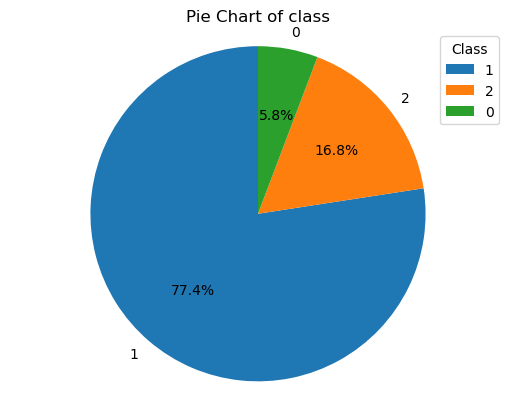

In [8]:
# Pie chart for the categorical column (class)
plt.figure()
class_counts = df['class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of class')
plt.axis('equal')  # Ensures the pie chart is a circle
plt.legend(class_counts.index, title="Class", loc="best")  # Add legend to the pie chart
#plt.savefig('../plots/Pie Chart of class.png')
plt.show()

In [9]:
# Prepare the text data
X_processed = df['processed_tweet']
y = df['class']

X_train_processed, X_test_processed, y_train_processed, y_test_processed = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier

In [12]:
# Initialize vectorizer with optimal parameters
vectorizer = CountVectorizer(max_features=None, min_df=5, ngram_range=(1, 1), stop_words=None)

# Initialize AdaBoostClassifier
classifier = AdaBoostClassifier(random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('count_vectorizer', vectorizer),
    ('adaboost', classifier)
])

# Start the timer
start_time = time.time()

# Fit the pipeline on your training data
pipe.fit(X_train_processed, y_train_processed)

# Stop the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Model trained successfully. Time elapsed: {elapsed_time} seconds.")

# Use the trained model to make predictions on your test data
y_pred = pipe.predict(X_test_processed)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_processed, y_pred)
print(f"Model accuracy: {accuracy}")

Model trained successfully. Time elapsed: 0.3875741958618164 seconds.
Model accuracy: 0.9011432414256894


# Testing the model

In [36]:
# let's say this is your new text
new_text = ['this boy is hoe']

# assuming 'vectorizer' and 'ada_model' are your fitted CountVectorizer and AdaBoostClassifier
# you may need to perform the same preprocessing on new_text that you did on your training data
new_text_processed = vectorizer.transform(new_text)

# predict the class of the new text
prediction = classifier.predict(new_text_processed)

# map the prediction to the actual class definition
class_map = {0: 'offensive', 1: 'hate speech', 2: 'neither'}
predicted_class = class_map[prediction[0]]

print(f'The predicted class is: {predicted_class}')

The predicted class is: hate speech
